## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from numba import njit
from pyccel.epyccel import epyccel


## Pure python function

In [37]:
def solve_1d_diff_pure(u, un, nt, nx, dt, dx, nu):
    for n in range(nt): 
        un = u.copy() 
        for i in range(1, nx - 1):
            u[i] = un[i] + nu * dt / dx**2 * (un[i+1] - 2 * un[i] + un[i-1])
        
        plt.plot(np.linspace(0, 2, nx), u);
    plt.show();
    return 0

## Numba accelerator

In [36]:
#add the numba decorator to accelerate code
@njit
def solve_1d_diff_numba(u, un, nt, nx, dt, dx, nu):
    for n in range(nt): 
        un = u.copy() 
        for i in range(1, nx - 1):
            u[i] = un[i] + nu * dt / dx**2 * (un[i+1] - 2 * un[i] + un[i-1])
        
        #plt.plot(np.linspace(0, 2, nx), u);
    #plt.show();
    return 0

## Pyccel accelerator

In [38]:
#add the pyccel decorator to accelerate code
def solve_1d_diff_pyccel(u : 'float[:]', un : 'float[:]', nt : int , nx : int, dt : float, dx : float, nu : float): 
    for n in range(nt): 
        un[:] = u[:] 
        for i in range(1, nx - 1):
            u[i] = un[i] + nu * dt / dx**2 * (un[i+1] - 2 * un[i] + un[i-1])
        
        #plt.plot(np.linspace(0, 2, nx), u);
    #plt.show();
    return 0

## Inputs

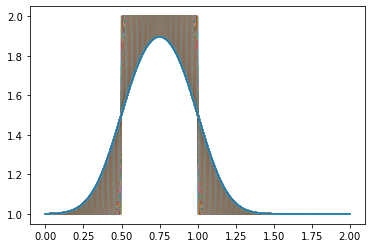

Text(0.5, 1.0, '1D Diffusion')

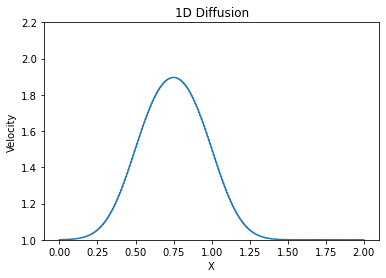

In [35]:
nx = 501
dx = 2 / (nx - 1)
nt = 1500    #the number of timesteps we want to calculate
nu = 0.3   #the value of viscosity
CFL = .5 #sigma is a parameter, we'll learn more about it later
dt = CFL * dx**2 / nu #dt is defined using sigma ... more later!
grid = np.linspace(0,2,nx) # creating the space grid

u0 = np.ones(nx)      #a numpy array with nx elements all equal to 1.
u0[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
plt.plot(grid,u0);
u = u0.copy()
un = np.ones(nx) #our placeholder array, un, to advance the solution in time

solve_1d_diff_pure(u, un, nt, nx, dt, dx, nu)
#Plotting data
plt.plot(grid,u);
plt.ylim([1.,2.2])
plt.xlabel('X')
plt.ylabel('Velocity')    
plt.title('1D Diffusion') 

## Call Funtions

### Pure function

In [9]:
%timeit solve_1d_diff_pure(u, un, nt, nx, dt, dx, nu)

811 ms ± 7.71 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with numba accelerator

In [13]:
%timeit solve_1d_diff_numba(u, un, nt, nx, dt, dx, nu)

1.12 ms ± 8.5 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with pyccel accelerator

In [40]:
solve_1d_diff_f90 = epyccel(solve_1d_diff_pyccel)

In [41]:
%timeit solve_1d_diff_f90(u, un, nt, nx, dt, dx, nu)

511 µs ± 2.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
